In [1]:
from __future__ import division
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import seaborn
from IPython.display import HTML
from tqdm import tqdm
from IPython.core.debugger import Pdb
import scipy.io as sio
from tqdm import trange, tqdm_notebook
pdb = Pdb()
# pdb.set_trace()
#import plotly.plotly as pl
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
figWidth = 11
figHeight = 8

In [47]:
class Model:
    def __init__():
        

IndentationError: expected an indented block (<ipython-input-47-8b85a027a4c1>, line 3)

In [2]:
def p_measure(x, z):
    # z can be 1 or 2
    # p is the probability of measuring z given the state
    if x == 1:
        p = 0.7
    else:
        p = 0.3
    if z == 2:
        p = 1. - p
    return p
    
def p_transition(x, x_next, u):
    if u == 3:
        if x_next == x:
            return 0.2
        else:
            return 0.8
    else:
        return 0.0
    
def r(x, u):
    if u == 3:
        return -1.
    if x == 1:
        if u == 1:
            return -100.
        if u == 2:
            return 100.
    if x == 2:
        if u == 1:
            return 100.
        if u == 2:
            return -50.
    raise Exception('should not have gotten here: x={}, x_next{}, u={}'.format(x, x_next, u))

In [3]:
def pruninate(Ups):
    pruned = set()
    for p in np.linspace(0., 1., 1000):
        max_elem = None
        max_val = 0.
        for elem in Ups:
            b = elem[1][0]
            m = elem[1][1] - b
            val = m*p + b
            if max_elem is None or val > max_val:
                max_elem = elem
                max_val = val
        pruned.add(max_elem)
    return pruned
            
            
            

In [8]:
def pomdp(T):
#     Ups = [(1, np.array([-100., 100.])),
#            (2, np.array([100., 50.])),
#            (3, np.array([-1., -1.]))]
#     Ups = [(0, (0, 0))]
    Ups = set([(0, (0, 0))])
    U = [1, 2, 3]
    N = [1, 2]
    Z = [1, 2]
    v_min = [0, 0]
    prune = True
    prunify = True
    gamma = 1.
    
    for t in tqdm_notebook(xrange(T)):
#         Ups_next = []
        Ups_next = set()
        V = np.zeros((len(Ups), len(U), len(Z), len(N)))
        
        for k, elem in enumerate(Ups):
            for l, u in enumerate(U):
                for zi, z in enumerate(Z):
                    for j, x in enumerate(N):
                        for i, x_next in enumerate(N):
#                             V[k, l, zi, j] += Ups[k][1][i]*p_measure(x, z)*p_transition(x, x_next, u)
                            V[k, l, zi, j] += elem[1][j]*p_measure(x, z)*p_transition(x, x_next, u)
                        
        for l, u in enumerate(U):
            for k1 in xrange(len(Ups)):
                for k2 in xrange(len(Ups)):
                    v = [0, 0]
                    for i, x in enumerate(N):
                        v[i] = gamma*(r(x, u) + V[k1, l, 0, i] + V[k2, l, 1, i])
#                     Ups_next.append((u, (v[0], v[1])))s
                    if prune:
                        if v[0] > v_min[0] or v[1] > v_min[1]:
                            Ups_next.add((u, (v[0], v[1])))
                            if v[0] > v_min[0] and v[1] > v_min[1]:
                                v_min[0] = v[0]
                                v_min[1] = v[1]
                    else:
                        Ups_next.add((u, (v[0], v[1])))
#                     print(u)
        if prunify:
            Ups_next = pruninate(Ups_next)
        Ups = Ups_next
#         print("t={}".format(t))
#         for elem in Ups:
#             print(elem)
        
    return Ups
                    

In [13]:

Ups = pomdp(20)
print(len(Ups))

A Jupyter Widget


116


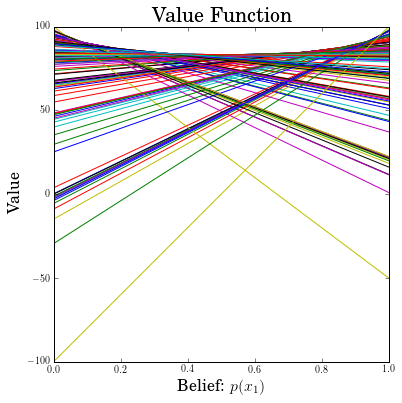

In [14]:
plt.close('all')
env = plt.figure(figsize=(6, 6))
ax = env.add_subplot(1, 1, 1)
ax.set_xlim((0, 1))
ax.set_ylim((-100, 100))
ax.set_title("Value Function",fontsize=20)
ax.set_xlabel("Belief: $p(x_1)$", fontsize=16)
ax.set_ylabel("Value", fontsize=16)


for line in Ups:
    ax.plot([0, 1], line[1])
plt.show()